In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data

In [2]:
# Load the data from MNIST-5-6-Subset.txt
# Change the path as needed
data_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset.txt"
data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)
# Load the labels from MNIST-5-6-Labels.txt
# Change the path as needed
labels_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset-Labels.txt"
labels = np.loadtxt(labels_file_path)


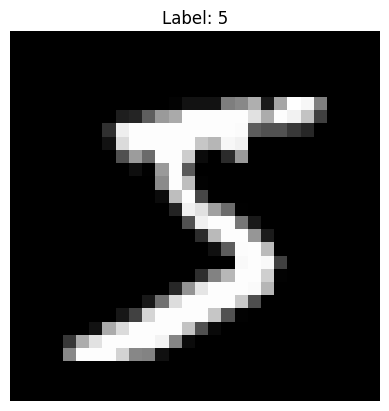

In [3]:
# Assuming you want to visualize the first image
# Change the index as needed
image_index = 0
image_data = data_matrix[image_index]
selected_label = int(labels[image_index])
# Visualize the image using Matplotlib
# We transpose the image to make the number look upright.
plt.imshow(image_data.reshape(28,28).transpose(1,0), cmap='gray')
plt.title(f"Label: {selected_label}")
plt.axis('off') # Turn off axis
plt.show()

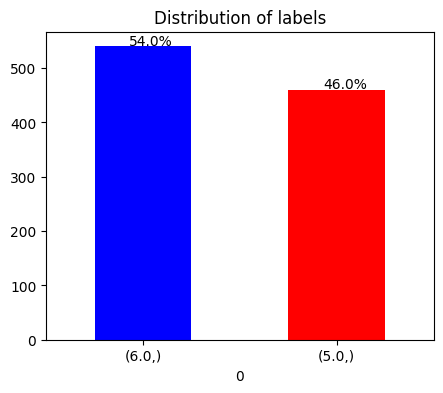

In [4]:

df = pd.DataFrame(data=(labels[:1000]))

labelCount = np.array(df.value_counts())
labelCount = (labelCount / labelCount.sum(axis=0) * 100).round(decimals=2).astype(str)
labelCount = list(map(lambda x : x+'%', labelCount))

# Plot
df.value_counts().plot(kind='bar', color=('blue', 'red'), figsize=(5,4))
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0)
i = 0
for p in ax.patches:
    ax.annotate(str(labelCount[i]), (p.get_x() + 0.18, p.get_height() * 1.005))
    i =+ 1
plt.title('Distribution of labels')
plt.show()



In [5]:
X_train, Y_train = data_matrix[:50], labels[:50]
X_test, Y_test = data_matrix[101], labels[101]

# Functions

In [6]:
'''
    Inputs: 
        training_points: d x m matrix 
            m - training points
            d - Dimmensions (28x28=784)
        training_labels - Corresponding m labels
        test_points: d x m matrix 
            m - training points
            d - Dimmensions (28x28=784)
        test_labels - Corresponding m labels
    Returns:
        A binary vector of lenght m
'''
def knn(training_points, training_labels, test_point, test_label):
    # Convert labels
    training_labels[training_labels == 5] = -1
    training_labels[training_labels == 6] = 1
    if test_label == 5: test_label = -1  
    else: test_label = 1
    
    # Calculate all distances
    dist = np.linalg.norm(test_point - training_points, axis=1)
    distSort = np.argsort(dist)
    res = list(map(lambda x: training_labels[x], distSort)) #From index to label
    
    # Cummalitive sum of list: If elm>0 then True, else False
    sum = np.cumsum(res)
    # Convert to guesses
    sum[sum > 0] = 1
    sum[sum <= 0] = -1
    # Check if guess is correct
    error = np.where(sum == test_label, 0, 1)
    
    return error

knn(X_train, Y_train, X_test, Y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [7]:
'''
    Input:
        data
        i - Number of the validaton set
        n - Size of validation set
        m - Size of training data

    return:
        validationset
'''
def splitVal(data, i, n, m): 
    return data[(m + (i * n) + 1 ) : ((m + ((i + 1)) * n) + 1)]



In [8]:
def plotValError(m, valError, valSet):
    # Dummy data, x and y
    x = np.arange(1, m+1)
    some_parameter = valSet
    # Initialise figure (fig) and axis (ax)
    fig, ax = plt.subplots(figsize=(8,5))
    # Plot in axis, add label to data
    for i in range (len(valError)):
        ax.plot(x, valError[i], label='Validation set ' + str(i+1) )
    # Set labels and title
    ax.set_xlabel('K')
    ax.set_ylabel('Error')
    ax.set_title(f'{some_parameter}')
    # Add grid
    ax.grid(alpha=0.2)
    # Set axes limits
    ax.set_ylim(0,1)
    # Add legend )
    ax.legend()
    # Show plot
    plt.show()
    # Save plot to some local path
    fig.savefig('validation_err.png')

# Task 1

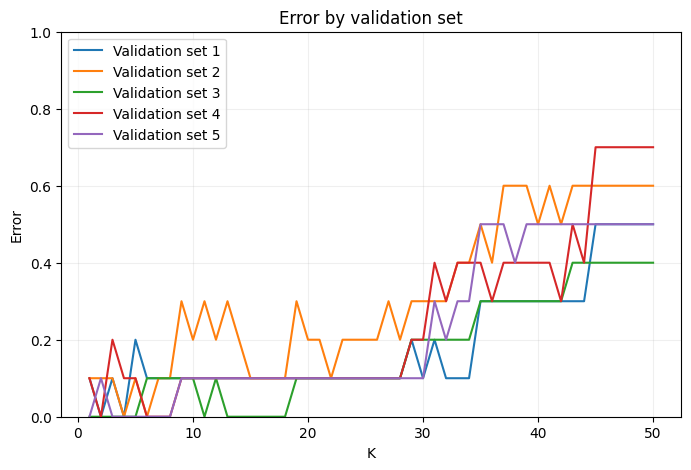

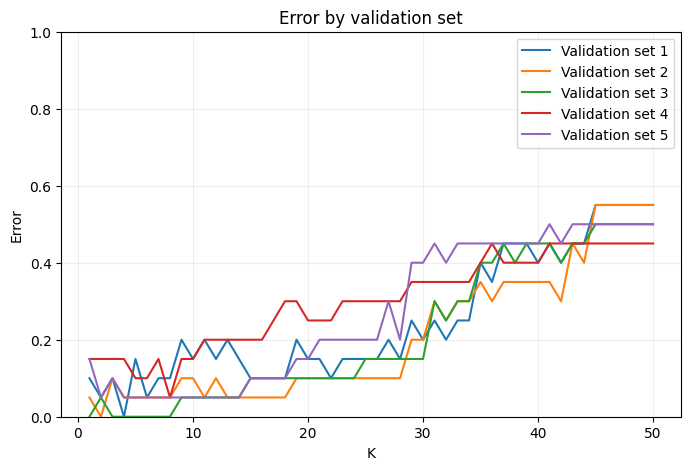

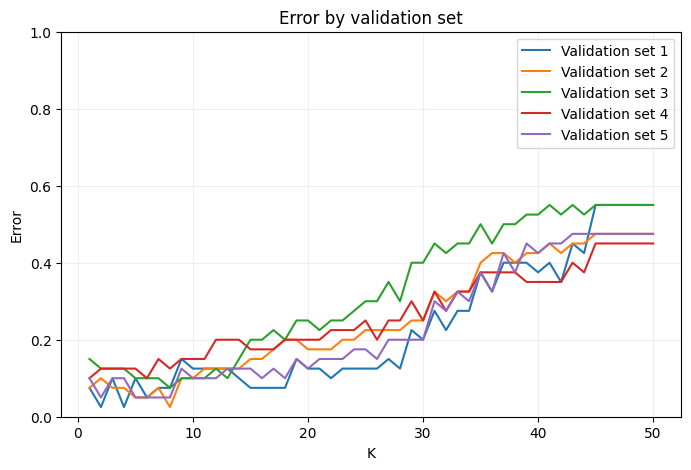

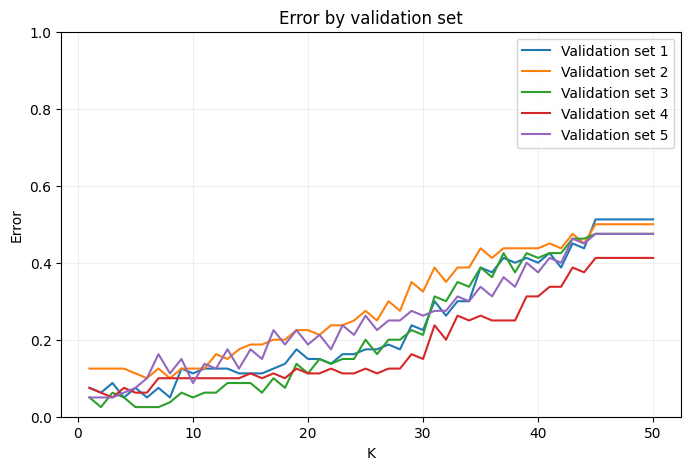

In [9]:
m = 50
nLst = [10, 20, 40, 80]

def solution1():
    for n in nLst:
        lst = []    
        for i in range (5):
            X_val = splitVal(data_matrix, i, n, m)
            Y_val = splitVal(labels, i, n, m)
            sumLst = np.zeros(m)
            for x in range (len(X_val)):
                something = knn(X_train, Y_train, X_val[x], Y_val[x])
                sumLst = sumLst + something
            sumLst = list(map(lambda elm : elm / n, sumLst))
            lst.append(sumLst)
        plotValError(m, lst, 'Error by validation set')
solution1()

In [10]:
def plotVariance(m, varList, n, valSet):
    # Dummy data, x and y
    x = np.arange(1, m+1)
    some_parameter = valSet
    # Initialise figure (fig) and axis (ax)
    fig, ax = plt.subplots(figsize=(8,5))
    # Plot in axis, add label to data
    for i in range (len(varList)):
        ax.plot(x, varList[i], label=' n = ' + str(n[i]) )

    # Set labels and title
    ax.set_xlabel('K')
    ax.set_ylabel('Vaiance')
    ax.set_title(f'{some_parameter}')
    # Add grid
    ax.grid(alpha=0.2)
    # Set axes limits
    # Add legend )
    ax.legend()
    # Show plot
    plt.show()
    # Save plot to some local path
    fig.savefig('validation_err.png')

4


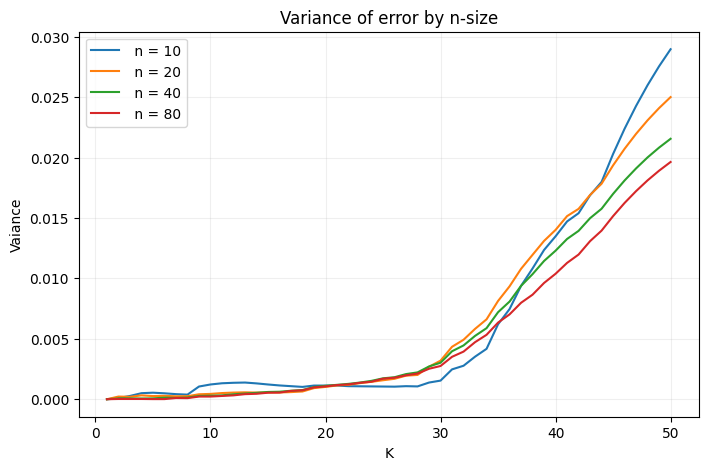

In [11]:

def solution2():
    varianceByN = []
    for n in nLst:
        lst = np.zeros(m)   
        for i in range (5):
            X_val = splitVal(data_matrix, i, n, m)
            Y_val = splitVal(labels, i, n, m)
            sumLst = np.zeros(m)
            for x in range (len(X_val)):
                something = knn(X_train, Y_train, X_val[x], Y_val[x])
                sumLst = sumLst + something
                
            
            lst = lst + sumLst
        lst = list(map(lambda elm : elm / (n*5), lst))

        #lst is a list of the sum of validation error for each k
        varList = []
        for k in range (len(lst)):
            foo = np.array(lst[:k+1])
            variance = np.var(foo)
            varList.append(round(variance,5))
        varianceByN.append(varList)

    print(len(varianceByN))
    plotVariance(m, varianceByN, nLst, 'Variance of error by n-size')
solution2()

# Task 2

MNIST-5-6-Subset/MNIST-5-6-Subset.txt


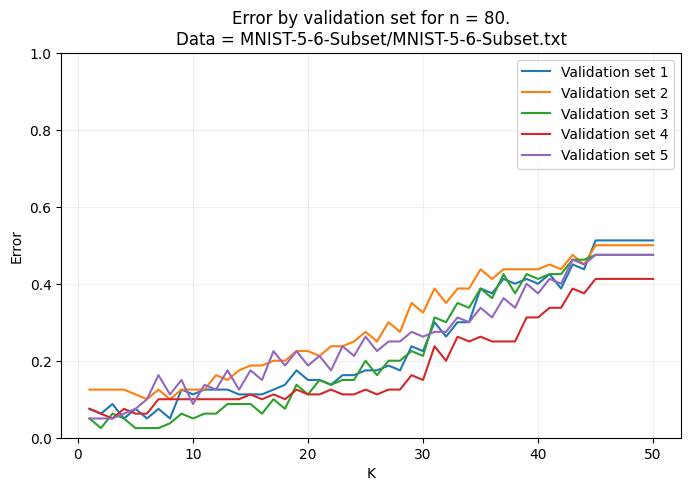

MNIST-5-6-Subset/MNIST-5-6-Subset-Light-Corruption.txt


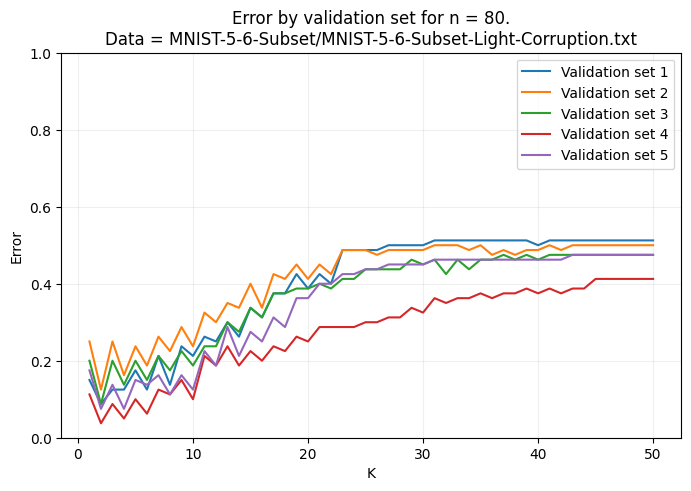

MNIST-5-6-Subset/MNIST-5-6-Subset-Moderate-Corruption.txt


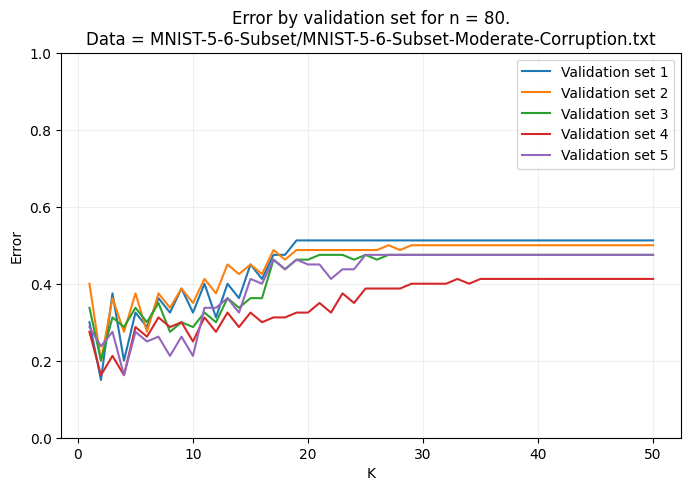

MNIST-5-6-Subset/MNIST-5-6-Subset-Heavy-Corruption.txt


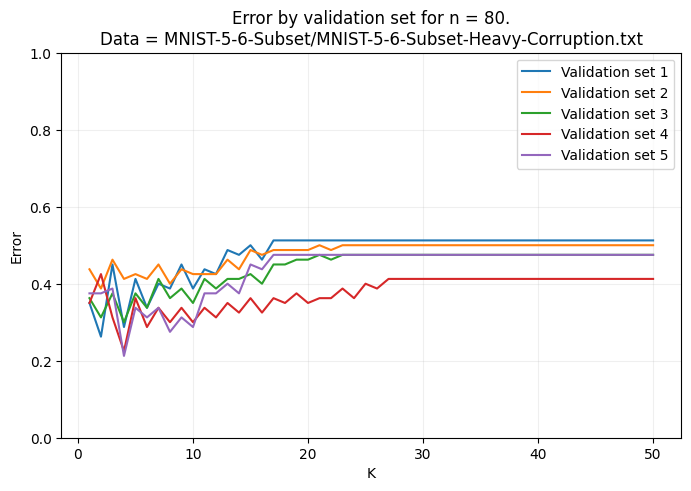

In [12]:
def allInOne(data, m, n):
    print(data)
    ##### --- Load data --- #####
    # Load the data from MNIST-5-6-Subset.txt
    # Change the path as needed
    data_file_path = data
    data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)
    # Load the labels from MNIST-5-6-Labels.txt
    # Change the path as needed
    labels_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset-Labels.txt"
    labels = np.loadtxt(labels_file_path)

    ##### --- saodnasodn --- #####
    lst = []
    for i in range (5):
        X_val = splitVal(data_matrix, i, n, m)
        Y_val = splitVal(labels, i, n, m)
        sumLst = np.zeros(m)
        for x in range (len(X_val)):
            something = knn(X_train, Y_train, X_val[x], Y_val[x])
            sumLst = sumLst + something
        sumLst = list(map(lambda elm : elm / n, sumLst))
        lst.append(sumLst)
    plotValError(m, lst, 'Error by validation set for n = 80.\nData = {}'.format(data))

allInOne("MNIST-5-6-Subset/MNIST-5-6-Subset.txt", 50, 80)
allInOne("MNIST-5-6-Subset/MNIST-5-6-Subset-Light-Corruption.txt", 50, 80)
allInOne("MNIST-5-6-Subset/MNIST-5-6-Subset-Moderate-Corruption.txt", 50, 80)
allInOne("MNIST-5-6-Subset/MNIST-5-6-Subset-Heavy-Corruption.txt", 50, 80)